In [1]:
import sys, getopt, os
import bonesis
import pandas as pd
from colomoto_jupyter import tabulate
import mpbn
import itertools
import math
import numpy
import networkx as nx
import pickle
#import ginsim
import re
import subprocess
import numpy as np
from matplotlib import pyplot as plt
from math import isnan
import clingo as asp
import mpbn

In [2]:
from copy import deepcopy 

In [3]:
sys.path.append('../py_src/')

import constraints
import funForBonesis

In [4]:
influenceGraph = "../output/Inference/infGraphLargeTrusted/infGraphTable45.tsv"
obsData= "obsDataPhenoMut.csv"
geneOrder = ["Egr1","Junb","Tal1","Bclaf1","Myc","Fli1","Gata2","Ikzf1","Spi1","Cebpa","Gata1","Klf1","Zfpm1","CDK46CycD","CIPKIP"]

In [5]:
influenceGraphTable = pd.read_table(influenceGraph)
influenceGraphTable = influenceGraphTable.drop_duplicates(subset=['tf', 'target', 'mor'])
influenceGraphTable

,tf,mor,target,ref,proof_level,cell_type,Trusted,Scenic,cistromeAdjScore,interaction0
0,Bclaf1,1,CDK46CycD,NaN,NaN,NaN,0,True,NaN,Bclaf1_CDK46CycD
1,Bclaf1,1,Bclaf1,NaN,NaN,NaN,0,True,NaN,Bclaf1_Bclaf1
2,Bclaf1,1,Myc,NaN,NaN,NaN,0,True,NaN,Bclaf1_Myc
3,Bclaf1,1,Cebpa,NaN,NaN,NaN,0,True,NaN,Bclaf1_Cebpa
4,Cebpa,1,Gata2,NaN,NaN,NaN,0,True,0.277000,Cebpa_Gata2
...,...,...,...,...,...,...,...,...,...,...
61,Tal1,-1,Cebpa,Krumsiek_2011,NaN,NaN,0,False,0.000000,Tal1_Cebpa
62,Zfpm1,-1,Gata2,Krumsiek_2011,NaN,NaN,1,False,0.139000,Zfpm1_Gata2
63,Zfpm1,-1,Cebpa,Krumsiek_2011,NaN,NaN,0,False,0.028000,Zfpm1_Cebpa
64,Cebpa,1,Cebpa,Krumsiek_2011,NaN,NaN,0,False,4.945000,Cebpa_Cebpa


In [6]:
influenceGraphTableTrusted = influenceGraphTable[influenceGraphTable["Trusted"]==1].copy()

In [7]:
influenceGraphTable[influenceGraphTable["target"]=="Gata2"]

,tf,mor,target,ref,proof_level,cell_type,Trusted,Scenic,cistromeAdjScore,interaction0
4,Cebpa,1,Gata2,NaN,NaN,NaN,0,True,0.277000,Cebpa_Gata2
8,Egr1,1,Gata2,NaN,NaN,NaN,0,True,0.000000,Egr1_Gata2
23,Gata2,1,Gata2,Krumsiek_2011,NaN,NaN,1,True,0.275000,Gata2_Gata2
24,Gata2,-1,Gata2,NaN,NaN,NaN,0,True,0.275000,Gata2_Gata2
26,Junb,1,Gata2,NaN,NaN,NaN,0,True,0.007417,Junb_Gata2
46,Spi1,-1,Gata2,Krumsiek_2011,NaN,NaN,1,False,0.002105,Spi1_Gata2
53,Gata1,-1,Gata2,Krumsiek_2011,NaN,NaN,1,False,0.353067,Gata1_Gata2
62,Zfpm1,-1,Gata2,Krumsiek_2011,NaN,NaN,1,False,0.139000,Zfpm1_Gata2


In [8]:
influenceGraphTable[influenceGraphTable["target"]=="Gata1"]

,tf,mor,target,ref,proof_level,cell_type,Trusted,Scenic,cistromeAdjScore,interaction0
15,Gata1,1,Gata1,Krumsiek_2011,NaN,NaN,1,True,2.538600,Gata1_Gata1
16,Gata1,-1,Gata1,NaN,NaN,NaN,0,True,2.538600,Gata1_Gata1
34,Klf1,1,Gata1,NaN,NaN,NaN,0,True,NaN,Klf1_Gata1
45,Ikzf1,-1,Gata1,Malinge_2013,"KO,_functionnal_interaction",NaN,1,False,NaN,Ikzf1_Gata1
47,Spi1,-1,Gata1,Krumsiek_2011,NaN,NaN,1,False,0.457333,Spi1_Gata1
50,Gata2,1,Gata1,Krumsiek_2011,NaN,NaN,1,False,0.414900,Gata2_Gata1
59,Fli1,1,Gata1,Krumsiek_2011,NaN,NaN,1,False,0.000000,Fli1_Gata1


In [9]:
influenceGraphTable[influenceGraphTable["target"]=="Cebpa"]

,tf,mor,target,ref,proof_level,cell_type,Trusted,Scenic,cistromeAdjScore,interaction0
3,Bclaf1,1,Cebpa,NaN,NaN,NaN,0,True,NaN,Bclaf1_Cebpa
20,Gata2,1,Cebpa,NaN,NaN,NaN,0,True,0.0102,Gata2_Cebpa
40,Myc,1,Cebpa,NaN,NaN,NaN,0,True,1.7226,Myc_Cebpa
42,Spi1,1,Cebpa,Dakic_2005,"KO,_functionnal_interaction",NaN,0,True,0.0000,Spi1_Cebpa
44,Ikzf1,-1,Cebpa,Rao_2013,transcriptionnal_regulation,NaN,1,False,NaN,Ikzf1_Cebpa
57,Gata1,-1,Cebpa,Krumsiek_2011,NaN,NaN,0,False,0.0000,Gata1_Cebpa
61,Tal1,-1,Cebpa,Krumsiek_2011,NaN,NaN,0,False,0.0000,Tal1_Cebpa
63,Zfpm1,-1,Cebpa,Krumsiek_2011,NaN,NaN,0,False,0.0280,Zfpm1_Cebpa
64,Cebpa,1,Cebpa,Krumsiek_2011,NaN,NaN,0,False,4.9450,Cebpa_Cebpa


In [10]:
influenceGraphTable[influenceGraphTable["target"]=="Fli1"]

,tf,mor,target,ref,proof_level,cell_type,Trusted,Scenic,cistromeAdjScore,interaction0
11,Fli1,1,Fli1,NaN,NaN,NaN,0,True,0.143500,Fli1_Fli1
13,Fli1,-1,Fli1,NaN,NaN,NaN,0,True,0.143500,Fli1_Fli1
19,Gata2,1,Fli1,NaN,NaN,NaN,0,True,0.660500,Gata2_Fli1
30,Junb,1,Fli1,NaN,NaN,NaN,0,True,0.049917,Junb_Fli1
35,Klf1,-1,Fli1,Krumsiek_2011,NaN,NaN,1,True,NaN,Klf1_Fli1
55,Gata1,1,Fli1,Krumsiek_2011,NaN,NaN,1,False,2.321600,Gata1_Fli1


# computing graph layout...


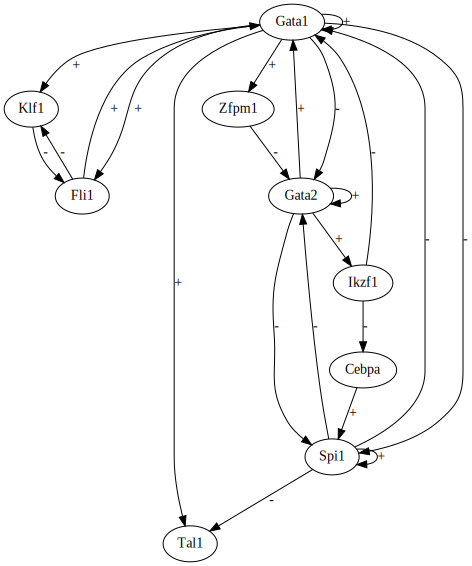

In [11]:
# Creating influence graph Trusted
infTrusted = []
for r in influenceGraphTableTrusted.index:
    infTrusted.append((influenceGraphTableTrusted["tf"][r],influenceGraphTableTrusted["target"][r],dict(sign= influenceGraphTableTrusted["mor"][r])))

domTrusted = bonesis.InfluenceGraph(infTrusted, maxclause = 3,exact=False)
domTrusted

In [12]:
# Creating influence graph 
inf0 = []
for r in influenceGraphTable.index:
    inf0.append((influenceGraphTable["tf"][r],influenceGraphTable["target"][r],dict(sign= influenceGraphTable["mor"][r])))



In [13]:
dataTable = pd.read_csv(obsData,index_col = 0)
data = dataTable.to_dict("index")
clean_data = dict() #Bug of mpbn if nan in dict
for o in data.keys():
    clean_data[o] = {k: data[o][k] for k in data[o] if not isnan(data[o][k])}

data= clean_data
pd.DataFrame(data)

,iHSC,qHSC,pLymph,pNeuMast,pMk,pEr,diff,diff2,zero,prolifNeuMast,srHSC,G0MkHSC
Egr1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
Junb,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Tal1,1.0,1.0,NaN,0.0,1.0,1.0,NaN,NaN,0.0,0.0,1.0,1.0
Myc,0.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,0.0,NaN
Fli1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
Ikzf1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spi1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
Cebpa,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Gata1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN
Klf1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# computing graph layout...


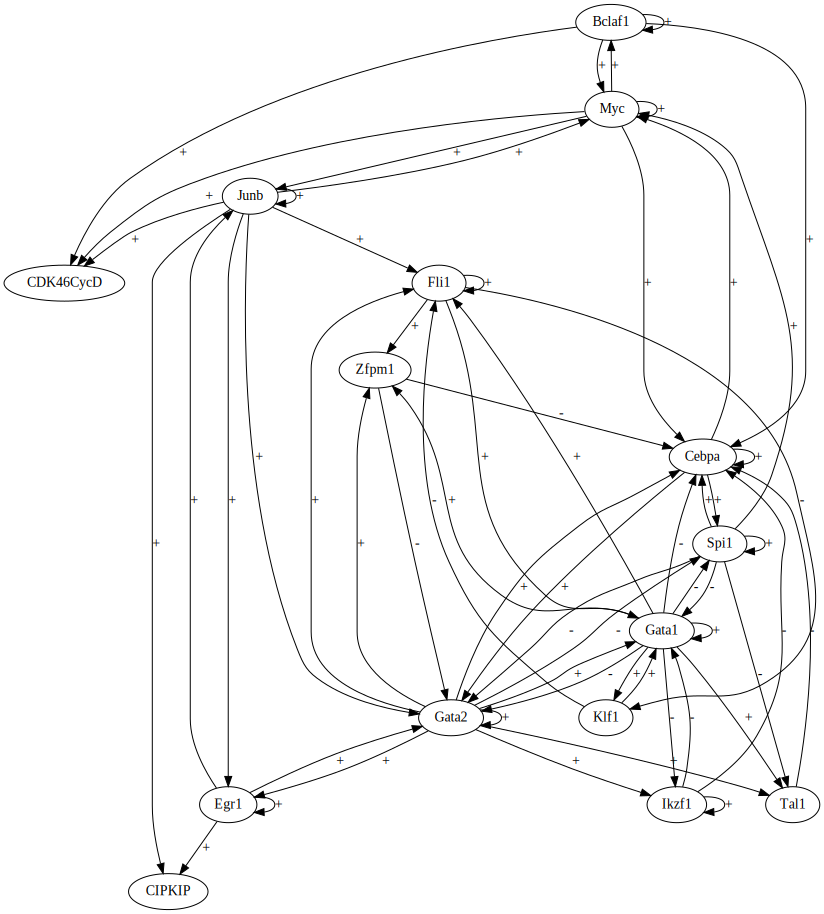

In [14]:
inf = inf0.copy()
#inf.remove(('Egr1', 'Gata2', {'sign': 1})) # no peaks
inf.remove(('Gata1', 'Gata1', {'sign': -1})) # no trust in auto neg from scenic plus already an autoact
inf.remove(('Myc', 'Myc', {'sign': -1})) #  no trust in auto neg from scenic 
inf.remove(('Gata2', 'Gata2', {'sign': -1})) #  no trust in auto neg from scenic plus already an autoact
inf.remove(('Egr1', 'Egr1', {'sign': -1})) #  no trust in auto neg from scenic 
inf.remove(('Junb', 'Junb', {'sign': -1})) #  no trust in auto neg from scenic 
inf.remove(('Fli1', 'Fli1', {'sign': -1})) #  no trust in auto neg from scenic 

#inf.remove(('Junb', 'Gata2', {'sign': 1})) #  no trust in auto neg from scenic 

dom0 = bonesis.InfluenceGraph(inf, maxclause = 3,exact=False)
allEdges = funForBonesis.multiDiGraphToEdgeList(dom0)
dom0

In [15]:
influenceGraphTable = influenceGraphTable[numpy.logical_not((influenceGraphTable["mor"] == -1) & (influenceGraphTable["tf"] == influenceGraphTable["target"]))]


In [16]:
len(influenceGraphTable)

60

In [17]:

    
bo0 = constraints.buildConstraints(inf = dom0,data = data,exact = False,maxclause = 2)


    # In[4]:


view = bo0.boolean_networks()   
filename = "optimization"
view.standalone(output_filename=filename+".asp")
a_file = open(filename+".asp", "r")
list_of_lines = a_file.readlines()


    # In[5]:

Trusted = []
Trusted = ['trustedin("'+ i[0]+'","'+i[1]+'",'+str([*i[2].values()][0])+').\n' for i in infTrusted]
Trusted += ['nTrustedEdges(N,X) :- clause(N,_,_,_),X = #count{L,S: clause(N,_,L,S),trustedin(L,N,S)}.\n',
            'trustedInKept(T) :- T=#sum{V,O: nTrustedEdges(O,V)}.\n',
            '#maximize{N@2:trustedInKept(N)}.\n']

insert_at = len(list_of_lines)-4   # Index starting from which multiple elements will be inserted

insert_elements = Trusted +['% Add an edges number minimization\n',
                    'nedges(N,X) :- clause(N,_,_,_),X = #count{L,S: clause(N,_,L,S),not trustedin(L,N,S)}.\n',
                    'totedges(T) :- T=#sum{V,O: nedges(O,V)}.\n',
                    '#minimize{N@1:totedges(N)}.\n']


list_of_lines[insert_at:insert_at] = insert_elements


    # In[6]:


a_file = open(filename+".asp", "w")
a_file.writelines(list_of_lines)
a_file.close()


In [ ]:
solving = funForBonesis.shell(['sh',filename+".asp"])

In [ ]:
optima = [s for s in solving[0].split('\\n') if "Optimization" in s][-1].split(':')[1]


minimumEdgesNonTrusted = int(optima.split(" ")[2])
minimumEdgesTrusted = -int(optima.split(" ")[1])

print(minimumEdgesNonTrusted)
print(minimumEdgesTrusted)


In [ ]:
view = bo0.boolean_networks()   
view.standalone(output_filename=filename+".asp")

In [63]:

view = bo0.boolean_networks()   
filename = "miniEdgeSol"
view.standalone(output_filename=filename+".asp")
a_file = open(filename+".asp", "r")
list_of_lines = a_file.readlines()


    # In[10]:


insert_at = len(list_of_lines)-4   # Index starting from which multiple elements will be inserted

insert_elements = Trusted[0:-3] + ['% Add a non trusted edges number limitation\n',
                    'nedges(N,X) :- clause(N,_,_,_),X = #count{L,S: clause(N,_,L,S),not trustedin(L,N,S)}.\n',
                    'totedges(T) :- T=#sum{V,O: nedges(O,V)}.\n',
                    ':- totedges(T) ; T>'+str(minimumEdgesNonTrusted)+'.\n'] +['% Add a trusted edges number limitation\n',
                    'nTrustedEdges(N,X) :- clause(N,_,_,_),X = #count{L,S: clause(N,_,L,S), trustedin(L,N,S)}.\n',
                    'trustedInKept(T) :- T=#sum{V,O: nTrustedEdges(O,V)}.\n',
                    ':- trustedInKept(T) ; T<'+str(minimumEdgesTrusted)+'.\n']


list_of_lines[insert_at:insert_at] = insert_elements


    # In[11]:


a_file = open(filename+".asp", "w")
a_file.writelines(list_of_lines)
a_file.close()

In [64]:
solving = funForBonesis.shell(['sh',filename+".asp"])

In [65]:

solving = [s for s in solving[0].split('\\n')]
#answerList = [l.strip("\n") for l in answerList]


# In[13]:


answerList = [l for l in solving if l.startswith("clause")]

len(answerList)


    # In[14]:


solutions = [funForBonesis.minibn_of_facts2(funForBonesis.getAnswerDict(sol)) for sol in answerList]


    # In[15]:


#pickle.dump(solutions, open(outDir+"/solutions.p", "wb" ),fix_imports=True,protocol=1 )

In [66]:
len(solutions)

2088

In [ ]:
pickle.dump(solutions, open("optimized_solutions.p", "wb" ),fix_imports=True,protocol=1 )


In [67]:
def getMutAttractors(geneMut,ko,sol,start):
    mut = []
    for s in solutions :
        m = s.copy()
        if ko :
            koStr = "KO"
            m[geneMut] = 0

        else:
            koStr = "KI"
            m[geneMut] = 1

        possiblePhDf = pd.DataFrame(m.attractors(reachable_from=start))
        possiblePhDf.sort_values(by= geneOrder, inplace=True)
        possiblePhDf.index = [str(i) for i in range(0,len(possiblePhDf))]
        possiblePh = possiblePhDf.to_dict() 
        #print(m)
        if possiblePh not in mut:
            mut.append(possiblePh)
    possiblePhAll = pd.DataFrame(mut[0])
    possiblePhAll = possiblePhAll.rename(index=lambda s: geneMut + koStr + "_0" + "_" + s)
    i=1
    for a in mut[1:]:
        df = pd.DataFrame(a)
        df.index = [str(j) for j in range(0,len(df))]
        df = df.rename(index=lambda s: geneMut + koStr +"_"+ str(i) + "_" + s)
        possiblePhAll = possiblePhAll.append(df)

        i += 1

    return possiblePhAll



In [68]:
data["iHSC_Junb1"] = data["iHSC"].copy()
data["iHSC_Junb1"]["Junb"] = 1
JunbKI = getMutAttractors(geneMut="Junb",ko = False,sol=solutions,start = data["iHSC_Junb1"])
JunbKI

,Zfpm1,Tal1,Spi1,Myc,Klf1,Junb,Ikzf1,Gata2,Gata1,Fli1,Egr1,Cebpa,CIPKIP,CDK46CycD,Bclaf1
JunbKI_0_0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,0
JunbKI_0_1,1,1,0,0,0,1,0,1,1,1,1,0,1,0,0


# computing graph layout...


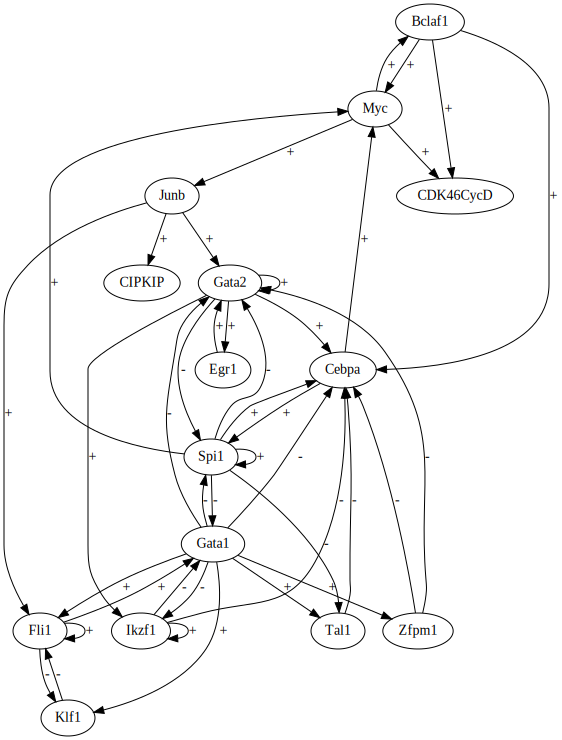

In [69]:
edgeList = []
nEdges = []
for s in solutions:
    nEdges.append(len([e for e in s.influence_graph().edges(data=True) if e not in edgeList]))
    for e in s.influence_graph().edges(data=True):
        edgeList.append(e) if e not in edgeList else edgeList
len(edgeList)

domPossible = bonesis.InfluenceGraph(edgeList, maxclause = 3,exact=False)
domPossible

In [70]:
len(domPossible.edges(data=True))
allEdges = funForBonesis.multiDiGraphToEdgeList(domPossible)
len(allEdges)

41

# computing graph layout...


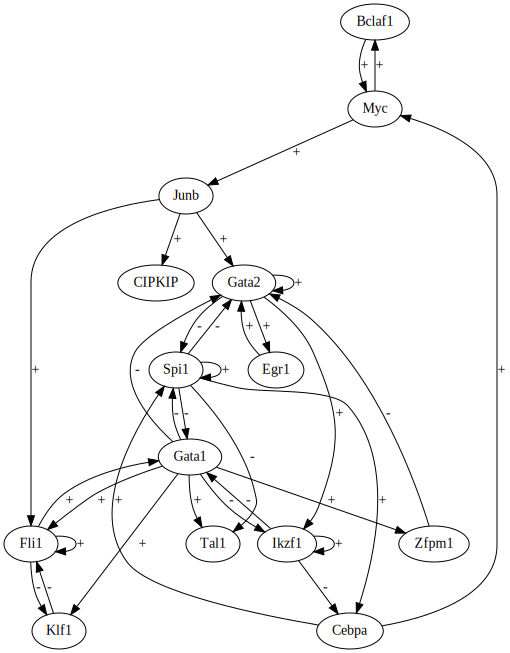

In [71]:
essentialEdges = list(solutions[-1].influence_graph().edges(data=True))
for e in essentialEdges:
    for s in range(len(solutions)-1):
        if e not in solutions[s].influence_graph().edges(data=True):
            essentialEdges.remove(e)
            break
        
  

domEssential = bonesis.InfluenceGraph(essentialEdges, maxclause = 3,exact=False)
domEssential

In [72]:
for i in range(len(essentialEdges)):
    essentialEdges[i][2].pop('label', None)

len(essentialEdges)


33

In [73]:
influenceGraphTable["essential"] = [True if inf[e] in essentialEdges else False for e in range(len(inf))]

In [74]:
influenceGraphTable["solution"] = [True if inf[e] in allEdges else False for e in range(len(inf))]
influenceGraphTable[(influenceGraphTable["essential"] == False) & (influenceGraphTable["solution"] == True)]

,tf,mor,target,ref,proof_level,cell_type,Trusted,Scenic,cistromeAdjScore,interaction0,essential,solution
0,Bclaf1,1,CDK46CycD,NaN,NaN,NaN,0,True,NaN,Bclaf1_CDK46CycD,False,True
3,Bclaf1,1,Cebpa,NaN,NaN,NaN,0,True,NaN,Bclaf1_Cebpa,False,True
20,Gata2,1,Cebpa,NaN,NaN,NaN,0,True,0.010200,Gata2_Cebpa,False,True
37,Myc,1,CDK46CycD,NaN,NaN,NaN,0,True,0.089400,Myc_CDK46CycD,False,True
43,Spi1,1,Myc,NaN,NaN,NaN,0,True,2.366281,Spi1_Myc,False,True
57,Gata1,-1,Cebpa,Krumsiek_2011,NaN,NaN,0,False,0.000000,Gata1_Cebpa,False,True
61,Tal1,-1,Cebpa,Krumsiek_2011,NaN,NaN,0,False,0.000000,Tal1_Cebpa,False,True
63,Zfpm1,-1,Cebpa,Krumsiek_2011,NaN,NaN,0,False,0.028000,Zfpm1_Cebpa,False,True


In [75]:
influenceGraphTable[(influenceGraphTable["essential"] == True)]

,tf,mor,target,ref,proof_level,cell_type,Trusted,Scenic,cistromeAdjScore,interaction0,essential,solution
2,Bclaf1,1,Myc,NaN,NaN,NaN,0,True,NaN,Bclaf1_Myc,True,True
5,Cebpa,1,Myc,NaN,NaN,NaN,0,True,2.982833,Cebpa_Myc,True,True
8,Egr1,1,Gata2,NaN,NaN,NaN,0,True,0.000000,Egr1_Gata2,True,True
11,Fli1,1,Fli1,NaN,NaN,NaN,0,True,0.143500,Fli1_Fli1,True,True
14,Gata1,1,Klf1,Krumsiek_2011,NaN,NaN,1,True,3.243200,Gata1_Klf1,True,True
17,Gata2,1,Ikzf1,Malinge_2013,transcriptionnal_regulation,NaN,1,True,0.370300,Gata2_Ikzf1,True,True
21,Gata2,1,Egr1,NaN,NaN,NaN,0,True,0.108300,Gata2_Egr1,True,True
23,Gata2,1,Gata2,Krumsiek_2011,NaN,NaN,1,True,0.275000,Gata2_Gata2,True,True
25,Ikzf1,1,Ikzf1,NaN,NaN,NaN,0,True,NaN,Ikzf1_Ikzf1,True,True
26,Junb,1,Gata2,NaN,NaN,NaN,0,True,0.007417,Junb_Gata2,True,True


In [76]:
finalEdges = allEdges.copy()
#finalEdges.remove(('Junb', 'CDK46CycD', {'sign': 1})) 
finalEdges.remove(('Bclaf1', 'Cebpa', {'sign': 1}))
finalEdges.remove(('Gata1', 'Cebpa', {'sign': -1})) # no clear proof only downreg
finalEdges.remove(('Tal1', 'Cebpa', {'sign': -1})) # no clear proof only downreg
#finalEdges.remove(('Zfpm1', 'Cebpa', {'sign': -1})) # weak peaks
#finalEdges.remove(('Gata2', 'Gata2', {'sign': 1})) # 
#finalEdges.remove(('Ikzf1', 'Ikzf1', {'sign': 1})) # Junb is activated in quiescent cell no peaks
#finalEdges.remove(('Cebpa', 'Gata2', {'sign': 1})) # No ref

finalEdges = finalEdges.copy()
#finalEdges.append(('Bclaf1', 'CDK46CycD', {'sign': 1})) # Junb is activated in quiescent cell
#finalEdges.append(('Myc', 'CDK46CycD', {'sign': 1})) # Junb is activated in quiescent cell
#finalEdges.append(('Gata2', 'Egr1', {'sign': 1})) # Junb is activated in quiescent cell
#finalEdges.append(('Junb', 'Gata2', {'sign': 1})) # Junb is activated in quiescent cell
#finalEdges.append(('Junb', 'Egr1', {'sign': 1})) # Junb is activated in quiescent cell
#finalEdges.append(('Gata1', 'Gata2', {'sign': -1})) # Junb is activated in quiescent cell
#finalEdges.append(('Zfpm1', 'Gata2', {'sign': -1})) # Junb is activated in quiescent cell
#finalEdges.append(('Gata2', 'Gata2', {'sign': 1})) # Junb is activated in quiescent cell
#finalEdges.append(('Gata1', 'Zfpm1', {'sign': 1})) # Junb is activated in quiescent cell


# computing graph layout...


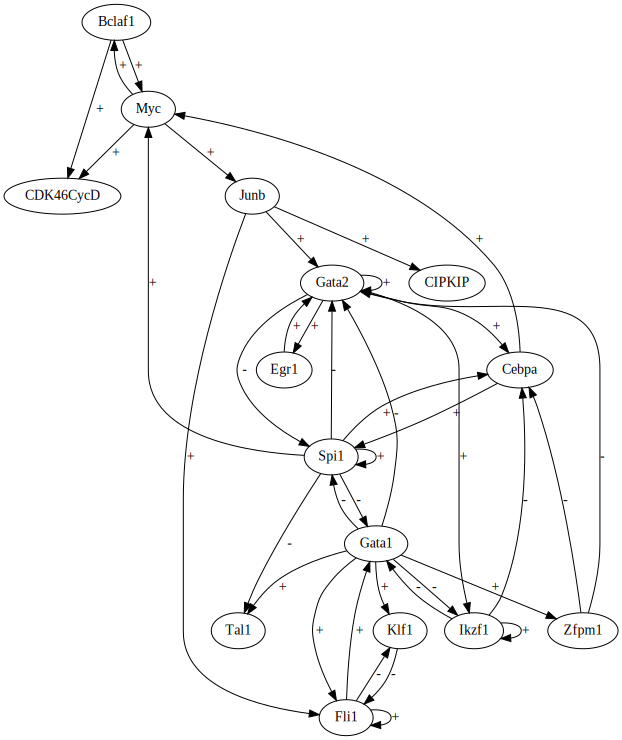

In [77]:
domMini = bonesis.InfluenceGraph(finalEdges, maxclause = 3,exact=True)
domMini

In [78]:
solutions = []
bo1 = constraints.buildConstraints(domMini,data = data,exact = True,maxclause = 2)
view = bo1.boolean_networks()
view.standalone(output_filename="secondInfExact.asp")


In [79]:
solutions = []
for bn in bo1.boolean_networks(limit = 2000): # limit is optional
    if(funForBonesis.has_cyclic(bn)):
        print("HAS CYCLIC ATTRACTORS, IGNORING")
        continue
    solutions.append(bn)

print(len(solutions))

Grounding...done in 0.1s
360


In [ ]:
pickle.dump(solutions, open("possible_final_solutions.p", "wb" ),fix_imports=True,protocol=1 )


In [82]:
table = pd.DataFrame(solutions)
table.sort_values(by=geneOrder, inplace=True)
table[geneOrder]

,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
288,Gata2,Myc,Gata1&!Spi1,Myc,Spi1&Bclaf1&Cebpa,Junb|(!Klf1&Gata1&Fli1),(Egr1&!Zfpm1&!Gata1)|(!Spi1&Junb&Gata2),(!Gata1&Gata2)|(Ikzf1&!Gata1),(!Gata1&!Gata2&Cebpa)|(Spi1&!Gata2&!Gata1),(!Ikzf1&!Zfpm1&Gata2)|(Spi1&!Zfpm1&!Ikzf1),!Spi1|(Fli1&!Ikzf1),Gata1&!Fli1,Gata1,Bclaf1&Myc,Junb
116,Gata2,Myc,Gata1&!Spi1,Myc,Spi1&Bclaf1&Cebpa,Junb|(!Klf1&Gata1&Fli1),(Egr1&!Zfpm1&!Gata1)|(!Spi1&Junb&Gata2),(!Gata1&Gata2)|(Ikzf1&!Gata1),(!Gata1&!Gata2&Cebpa)|(Spi1&!Gata2&!Gata1),(!Ikzf1&!Zfpm1&Gata2)|(Spi1&!Zfpm1&!Ikzf1),!Spi1|(Fli1&!Ikzf1),Gata1&!Fli1,Gata1,Bclaf1|Myc,Junb
102,Gata2,Myc,Gata1&!Spi1,Myc,Spi1&Bclaf1&Cebpa,Junb|(!Klf1&Gata1&Fli1),(Egr1&!Zfpm1&!Gata1)|(!Spi1&Junb&Gata2),(!Gata1&Gata2)|(Ikzf1&!Gata1),(!Gata1&!Gata2&Cebpa)|(Spi1&!Gata2&!Gata1),(Spi1&!Ikzf1)|(!Ikzf1&!Zfpm1&Gata2),!Spi1|(Fli1&!Ikzf1),Gata1&!Fli1,Gata1,Bclaf1&Myc,Junb
146,Gata2,Myc,Gata1&!Spi1,Myc,Spi1&Bclaf1&Cebpa,Junb|(!Klf1&Gata1&Fli1),(Egr1&!Zfpm1&!Gata1)|(!Spi1&Junb&Gata2),(!Gata1&Gata2)|(Ikzf1&!Gata1),(!Gata1&!Gata2&Cebpa)|(Spi1&!Gata2&!Gata1),(Spi1&!Ikzf1)|(!Ikzf1&!Zfpm1&Gata2),!Spi1|(Fli1&!Ikzf1),Gata1&!Fli1,Gata1,Bclaf1|Myc,Junb
80,Gata2,Myc,Gata1&!Spi1,Myc,Spi1&Bclaf1&Cebpa,Junb|(!Klf1&Gata1&Fli1),(Egr1&!Zfpm1&!Gata1)|(!Spi1&Junb&Gata2),(!Gata1&Gata2)|(Ikzf1&!Gata1),(!Gata1&!Gata2&Cebpa)|(Spi1&!Gata2&!Gata1),(!Zfpm1&Gata2)|(Spi1&!Ikzf1),!Spi1|(Fli1&!Ikzf1),Gata1&!Fli1,Gata1,Bclaf1&Myc,Junb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,Gata2,Myc,Gata1|!Spi1,Myc,Spi1&Bclaf1&Cebpa,(!Klf1&Junb)|(!Klf1&Gata1&Fli1),(!Spi1&Junb&Gata2)|(!Zfpm1&Egr1&!Spi1&!Gata1),(!Gata1&Gata2)|(Ikzf1&!Gata1),(Spi1&!Gata1)|(!Gata1&!Gata2&Cebpa),(Spi1&!Ikzf1)|(!Ikzf1&!Zfpm1&Gata2),!Spi1|(Fli1&!Ikzf1),Gata1&!Fli1,Gata1,Bclaf1|Myc,Junb
157,Gata2,Myc,Gata1|!Spi1,Myc,Spi1&Bclaf1&Cebpa,(!Klf1&Junb)|(!Klf1&Gata1&Fli1),(!Spi1&Junb&Gata2)|(!Zfpm1&Egr1&!Spi1&!Gata1),(!Gata1&Gata2)|(Ikzf1&!Gata1),(Spi1&!Gata1)|(!Gata1&!Gata2&Cebpa),(!Zfpm1&Gata2)|(Spi1&!Ikzf1),!Spi1|(Fli1&!Ikzf1),Gata1&!Fli1,Gata1,Bclaf1&Myc,Junb
11,Gata2,Myc,Gata1|!Spi1,Myc,Spi1&Bclaf1&Cebpa,(!Klf1&Junb)|(!Klf1&Gata1&Fli1),(!Spi1&Junb&Gata2)|(!Zfpm1&Egr1&!Spi1&!Gata1),(!Gata1&Gata2)|(Ikzf1&!Gata1),(Spi1&!Gata1)|(!Gata1&!Gata2&Cebpa),(!Zfpm1&Gata2)|(Spi1&!Ikzf1),!Spi1|(Fli1&!Ikzf1),Gata1&!Fli1,Gata1,Bclaf1|Myc,Junb
49,Gata2,Myc,Gata1|!Spi1,Myc,Spi1&Bclaf1&Cebpa,(!Klf1&Junb)|(!Klf1&Gata1&Fli1),(!Spi1&Junb&Gata2)|(!Zfpm1&Egr1&!Spi1&!Gata1),(!Gata1&Gata2)|(Ikzf1&!Gata1),(Spi1&!Gata1)|(!Gata1&!Gata2&Cebpa),(!Zfpm1&Gata2)|(Spi1&!Zfpm1&!Ikzf1),!Spi1|(Fli1&!Ikzf1),Gata1&!Fli1,Gata1,Bclaf1&Myc,Junb


In [83]:
table.nunique()

Bclaf1       1
CDK46CycD    2
CIPKIP       1
Cebpa        4
Egr1         1
Fli1         3
Gata1        1
Gata2        3
Ikzf1        1
Junb         1
Klf1         1
Myc          1
Spi1         6
Tal1         2
Zfpm1        1
dtype: int64

In [86]:
print(pd.DataFrame(table["CDK46CycD"].unique())) # 1 obvious
print(pd.DataFrame(table["Cebpa"].unique())) # 0 simpler one activator none inhibitor
print(pd.DataFrame(table["Fli1"].unique())) # 2 closer to Krum (!Klf1&Junb)|(!Klf1&Gata1&Fli1)
print(pd.DataFrame(table["Gata2"].unique())) # 1  (Junb&Gata2)|(!Zfpm1&Egr1&!Spi1&!Gata1)
print(pd.DataFrame(table["Spi1"].unique())) # 0 ref Krumsiek (!Gata1&!Gata2&Cebpa)|(Spi1&!Gata2&!Gata1)
print(pd.DataFrame(table["Tal1"].unique())) # 0 ref Krumsiek

            0
0  Bclaf1&Myc
1  Bclaf1|Myc
                                            0
0  (!Ikzf1&!Zfpm1&Gata2)|(Spi1&!Zfpm1&!Ikzf1)
1         (Spi1&!Ikzf1)|(!Ikzf1&!Zfpm1&Gata2)
2                (!Zfpm1&Gata2)|(Spi1&!Ikzf1)
3         (!Zfpm1&Gata2)|(Spi1&!Zfpm1&!Ikzf1)
                                 0
0          Junb|(!Klf1&Gata1&Fli1)
1        (Gata1&Fli1)|(!Klf1&Junb)
2  (!Klf1&Junb)|(!Klf1&Gata1&Fli1)
                                               0
0        (Egr1&!Zfpm1&!Gata1)|(!Spi1&Junb&Gata2)
1        (Junb&Gata2)|(!Zfpm1&Egr1&!Spi1&!Gata1)
2  (!Spi1&Junb&Gata2)|(!Zfpm1&Egr1&!Spi1&!Gata1)
                                            0
0  (!Gata1&!Gata2&Cebpa)|(Spi1&!Gata2&!Gata1)
1         (!Gata2&Cebpa)|(Spi1&!Gata2&!Gata1)
2                  Cebpa|(Spi1&!Gata2&!Gata1)
3         (!Gata1&Cebpa)|(Spi1&!Gata2&!Gata1)
4                (!Gata2&Cebpa)|(Spi1&!Gata1)
5         (Spi1&!Gata1)|(!Gata1&!Gata2&Cebpa)
             0
0  Gata1&!Spi1
1  Gata1|!Spi1


In [87]:
CDK46CycDRule = table["CDK46CycD"].unique()[1]
CebpaRule = table["Cebpa"].unique()[0]
Fli1Rule = table["Fli1"].unique()[2]
Gata2Rule = table["Gata2"].unique()[1]
Spi1Rule = table["Spi1"].unique()[0]
Tal1Rule = table["Tal1"].unique()[0]
#Ikzf1Rule = table["Ikzf1"].unique()[2]


#CIPKIPRule = table["CIPKIP"].unique()[1]
tableFinal = table.copy()

In [88]:
tableFinal = tableFinal[(tableFinal["CDK46CycD"] == CDK46CycDRule)&
                        (tableFinal["Tal1"] == Tal1Rule) &
                        (tableFinal["Spi1"] == Spi1Rule)&
                        (tableFinal["Fli1"] == Fli1Rule) &
                        (tableFinal["Cebpa"] == CebpaRule) &
                        (tableFinal["Gata2"] == Gata2Rule)
                       ]

In [89]:
tableFinal.nunique()

Bclaf1       1
CDK46CycD    1
CIPKIP       1
Cebpa        1
Egr1         1
Fli1         1
Gata1        1
Gata2        1
Ikzf1        1
Junb         1
Klf1         1
Myc          1
Spi1         1
Tal1         1
Zfpm1        1
dtype: int64

In [90]:
solutionFinal = solutions[tableFinal.index[0]] #### result order should be stable with the sorting
print(solutionFinal)

Bclaf1 <- Myc
CDK46CycD <- Bclaf1|Myc
CIPKIP <- Junb
Cebpa <- (!Ikzf1&!Zfpm1&Gata2)|(Spi1&!Zfpm1&!Ikzf1)
Egr1 <- Gata2
Fli1 <- (!Klf1&Junb)|(!Klf1&Gata1&Fli1)
Gata1 <- !Spi1|(Fli1&!Ikzf1)
Gata2 <- (Junb&Gata2)|(!Zfpm1&Egr1&!Spi1&!Gata1)
Ikzf1 <- (!Gata1&Gata2)|(Ikzf1&!Gata1)
Junb <- Myc
Klf1 <- Gata1&!Fli1
Myc <- Spi1&Bclaf1&Cebpa
Spi1 <- (!Gata1&!Gata2&Cebpa)|(Spi1&!Gata2&!Gata1)
Tal1 <- Gata1&!Spi1
Zfpm1 <- Gata1



# computing graph layout...


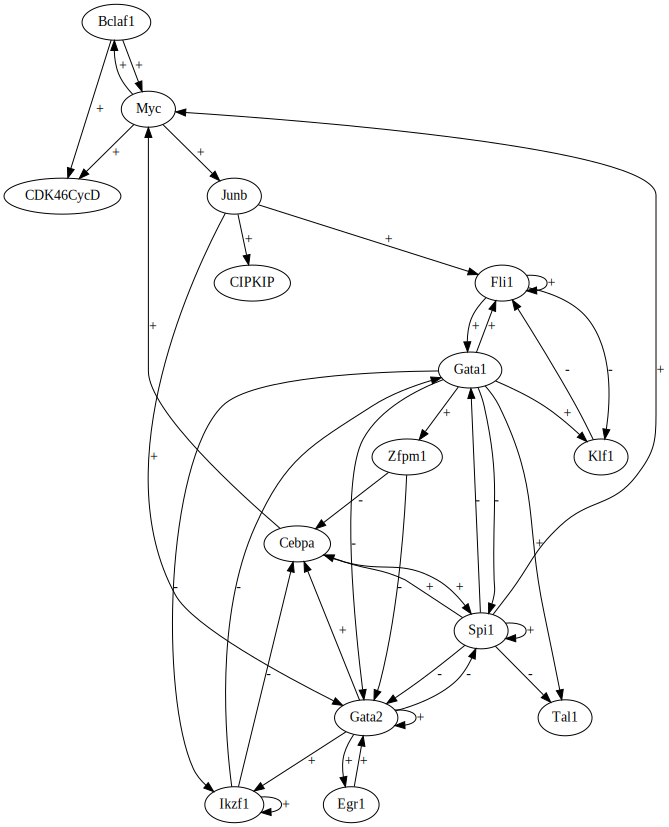

In [91]:
solutionFinal.influence_graph()

In [ ]:
pickle.dump(solutionFinal, open("final_solution.p", "wb" ),fix_imports=True,protocol=1 )


In [ ]:
sol = solutionFinal.to_biolqm()
sol = biolqm.to_ginsim(sol)
sol.save('solutionFinal0321.zginml')

In [92]:
attFromHSC = pd.DataFrame(solutionFinal.attractors(reachable_from=clean_data["iHSC"]))[geneOrder]
attFromHSC = attFromHSC.rename(index={0: 'pLymph',1:"pNeuMast",2:"pMk",3:"pEr"})
attFromHSC = attFromHSC.transpose()
attFromHSC = attFromHSC.style.apply(lambda x: ["background: black" if v == "*" else  "background: yellow" if v == 1 else "background: purple" for v in x], axis = 1)
attFromHSC

,pLymph,pMye,pMk,pEr
Egr1,0,0,0,0
Junb,0,0,0,0
Tal1,0,0,1,1
Bclaf1,0,0,0,0
Myc,0,0,0,0
Fli1,0,0,1,0
Gata2,0,0,0,0
Ikzf1,0,1,0,0
Spi1,1,1,0,0
Cebpa,1,0,0,0


In [123]:
test_mut = solutionFinal.copy()
test_mut["Junb"] = 1
#test_mut["Gata1"] = 1

print("reachability of quiescence state:")
print(test_mut.reachability(data["iHSC"],data["qHSC"]))
print("reachability of SR state:")
print(test_mut.reachability(data["iHSC"],data["srHSC"]))
attfromHSCOldTgf = pd.DataFrame(test_mut.attractors(reachable_from=data["iHSC_Junb1"]))[geneOrder]
attfromHSCOldTgf = attfromHSCOldTgf.rename(index={0: 'G0_bMk'})
attfromHSCOldTgf

reachability of quiescence state:
False
reachability of SR state:
False


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
G0_bMk,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1
1,0,1,1,0,0,1,0,0,0,0,1,0,1,0,1


In [124]:
test_mut = solutionFinal.copy()
test_mut["Junb"] = 0
#test_mut["Gata1"] = 1

print("reachability of quiescence state:")
print(test_mut.reachability(data["iHSC"],data["qHSC"]))
print("reachability of SR state:")
print(test_mut.reachability(data["iHSC"],data["srHSC"]))
attfromHSCNoTgf = pd.DataFrame(test_mut.attractors(reachable_from=data["iHSC"]))[geneOrder]
attfromHSCNoTgf

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0


In [125]:
test_mut = solutionFinal.copy()
test_mut["Egr1"] = 1
#test_mut["Gata1"] = 1

print("reachability of quiescence state:")
print(test_mut.reachability(data["iHSC"],data["qHSC"]))
print("reachability of SR state:")
print(test_mut.reachability(data["iHSC"],data["srHSC"]))
attfromHSCNoEpo = pd.DataFrame(test_mut.attractors(reachable_from=data["iHSC"]))[geneOrder]
attfromHSCNoEpo

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0
3,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0


In [120]:
solutionFinal

Bclaf1 <- Myc
CDK46CycD <- Bclaf1|Myc
CIPKIP <- Junb
Cebpa <- (Gata2&!Ikzf1&!Zfpm1)|(Spi1&!Ikzf1&!Zfpm1)
Egr1 <- Gata2
Fli1 <- (!Klf1&Junb)|(Fli1&!Klf1&Gata1)
Gata1 <- !Spi1|(Fli1&!Ikzf1)
Gata2 <- (Gata2&Junb&!Spi1)|(!Spi1&!Zfpm1&!Gata1&Egr1)
Ikzf1 <- (Gata2&!Gata1)|(!Gata1&Ikzf1)
Junb <- Myc
Klf1 <- !Fli1&Gata1
Myc <- Spi1&Bclaf1&Cebpa
Spi1 <- (!Gata2&Cebpa)|(Spi1&!Gata1&!Gata2)
Tal1 <- !Spi1&Gata1
Zfpm1 <- Gata1

In [93]:
def testPerturb(model,perturbation,data):
    test_mut = model.copy()
    del test_mut[[*perturbation.keys()][0]]
    test_mut[[*perturbation.keys()][0]] = [*perturbation.values()][0]
    data_mut = deepcopy(data)
    if ([*perturbation.values()][0] == 1) | ([*perturbation.values()][0] == 0):
        data_mut["iHSC"][[*perturbation.keys()][0]] = [*perturbation.values()][0]
    print("reachability of quiescence state:")
    print(test_mut.reachability(data["iHSC"],data_mut["qHSC"]))
    print("reachability of SR state:")
    print(test_mut.reachability(data["iHSC"],data_mut["srHSC"]))
    att = pd.DataFrame(test_mut.attractors(reachable_from=data_mut["iHSC"]))[geneOrder]
    return att
    

In [94]:

testPerturb(solutionFinal,{"Junb":1},data)

reachability of quiescence state:
True
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,1
1,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1


In [95]:
testPerturb(solutionFinal,{"Junb":0},data)

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0


In [98]:
testPerturb(solutionFinal,{"Egr1":0},data)

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0


In [99]:
testPerturb(solutionFinal,{"Egr1":1},data)

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0
3,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0


In [100]:
testPerturb(solutionFinal,{"Fli1":0},data)

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,1,0,1,1,0,0,0,1,1,0,0,0,1,1
2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0


In [101]:
testPerturb(solutionFinal,{"Fli1":1},data)

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0


In [103]:
testPerturb(solutionFinal,{"Gata1":0},data)

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,1,1,1,0,0,1,1,0,0,0,1,1
3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
5,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [105]:
testPerturb(solutionFinal,{"Gata1":1},data)

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0


In [107]:
testPerturb(solutionFinal,{"Klf1":0},data)

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0


In [109]:
testPerturb(solutionFinal,{"Zfpm1":0},data)

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0


In [111]:
testPerturb(solutionFinal,{"Tal1":0},data)

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


In [116]:
testPerturb(solutionFinal,{"Gata2":1},data)

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0
1,1,0,1,0,0,0,1,0,0,0,1,1,1,0,0


In [117]:
testPerturb(solutionFinal,{"Gata2":0},data)

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0


In [118]:
testPerturb(solutionFinal,{"Myc":0},data)

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0


In [121]:
testPerturb(solutionFinal,{"Myc":1},data)

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,0,1,0,1,1,1,0,1,1,0,0,0,0,1,1
1,1,1,1,1,1,0,1,0,0,0,1,1,1,1,1
2,1,1,1,1,1,1,1,0,0,0,1,0,1,1,1
3,0,1,1,1,1,0,0,0,0,0,1,1,1,1,1
4,0,1,1,1,1,1,0,0,0,0,1,0,1,1,1


In [119]:
testPerturb(solutionFinal,{"Bclaf1":0},data)

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0


In [120]:
testPerturb(solutionFinal,{"Bclaf1":1},data)

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0
2,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0


In [123]:
testPerturb(solutionFinal,{"Cebpa":0},data)

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0


In [124]:
testPerturb(solutionFinal,{"Spi1":0},data)

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0


In [125]:
testPerturb(solutionFinal,{"Ikzf1":0},data)

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0


In [127]:
solutionFinal

Bclaf1 <- Myc
CDK46CycD <- Bclaf1|Myc
CIPKIP <- Junb
Cebpa <- (!Ikzf1&!Zfpm1&Gata2)|(Spi1&!Zfpm1&!Ikzf1)
Egr1 <- Gata2
Fli1 <- (!Klf1&Junb)|(!Klf1&Gata1&Fli1)
Gata1 <- !Spi1|(Fli1&!Ikzf1)
Gata2 <- (Junb&Gata2)|(!Zfpm1&Egr1&!Spi1&!Gata1)
Ikzf1 <- (!Gata1&Gata2)|(Ikzf1&!Gata1)
Junb <- Myc
Klf1 <- Gata1&!Fli1
Myc <- Spi1&Bclaf1&Cebpa
Spi1 <- (!Gata1&!Gata2&Cebpa)|(Spi1&!Gata2&!Gata1)
Tal1 <- Gata1&!Spi1
Zfpm1 <- Gata1

In [128]:
testPerturb(solutionFinal,{"Cebpa":"(Spi1&!Zfpm1&!Ikzf1)"},data)

reachability of quiescence state:
False
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0


In [136]:
test_mut = solutionFinal.copy()
test_mut["Junb"] = 1
test_mut["Cebpa"] = "(Spi1&!Zfpm1&!Ikzf1)"

print("reachability of quiescence state:")
print(test_mut.reachability(data["iHSC"],data["qHSC"]))
print("reachability of SR state:")
print(test_mut.reachability(data["iHSC"],data["srHSC"]))
attfromHSCNoEpo = pd.DataFrame(test_mut.attractors(reachable_from=data["qHSC"]))[geneOrder]
attfromHSCNoEpo

reachability of quiescence state:
True
reachability of SR state:
True


,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
0,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1
